In [10]:
# run stopwatch
from tools import Stopwatch
stopwatch = Stopwatch()
start = stopwatch.start()

### Load libraries, functions, palette, theme

In [11]:
%run _libraries.ipynb

In [12]:
%run _functions.ipynb

In [13]:
dir_save_files = 'files/'

In [14]:
dir_load_files = 'files/'

In [15]:
dir_save_img = 'docs/img/'

In [16]:
session_name = 'research'

# Section IV. Machine Learning

## Load Saved Section if exists

## Load Data

In [17]:
train = loadit('train_preprocessed', dir=dir_load_files)

In [18]:
valid = loadit('valid_preprocessed', dir=dir_load_files)

In [19]:
test = loadit('test_preprocessed', dir=dir_load_files)

In [20]:
features_dict = loadit('features_dict', dir=dir_load_files)

In [21]:
target = features_dict['target']

In [22]:
features = features_dict['features'].copy()

## ML-model

In [23]:
lgb = LGBMRegressor()

In [24]:
x_train_lgb = train.loc['2017-07-01':, features].copy()

In [25]:
x_train_lgb

,temperature,humidity,windspeed,minute,hour,weekday,is_Friday,is_Sunday,is_31,target1_previous_month,minute_of_day
2017-07-01 00:00:00,21.10,70.60,4.915,0,0,5,0,0,0,37355.01639,0.0
2017-07-01 00:10:00,21.12,70.30,4.914,10,0,5,0,0,0,36813.63934,10.0
2017-07-01 00:20:00,21.03,70.50,4.918,20,0,5,0,0,0,36385.57377,20.0
2017-07-01 00:30:00,21.06,70.20,4.919,30,0,5,0,0,0,36033.04918,30.0
2017-07-01 00:40:00,21.09,70.80,4.918,40,0,5,0,0,0,35667.93443,40.0
...,...,...,...,...,...,...,...,...,...,...,...
2017-07-31 23:10:00,25.10,69.09,4.901,10,23,0,0,0,1,40205.56291,1390.0
2017-07-31 23:20:00,25.15,68.72,4.904,20,23,0,0,0,1,39423.57616,1400.0
2017-07-31 23:30:00,25.22,71.60,4.905,30,23,0,0,0,1,38883.17881,1410.0
2017-07-31 23:40:00,25.10,74.70,4.907,40,23,0,0,0,1,38107.54967,1420.0


In [26]:
y_train_lgb = train.loc['2017-07-01':, 'target1'].values

In [27]:
y_train_lgb

array([36384.31894, 35689.03654, 34751.36213, ..., 41659.53488,
       40843.05648, 39631.09635])

In [29]:
x_valid_lgb = valid[features].copy()

In [30]:
x_valid_lgb

,temperature,humidity,windspeed,minute,hour,weekday,is_Friday,is_Sunday,is_31,target1_previous_month,minute_of_day
2017-08-01 00:00:00,24.82,77.2,4.903,0,0,1,0,0,0,36384.31894,0.0
2017-08-01 00:10:00,24.72,77.7,4.906,10,0,1,0,0,0,35689.03654,10.0
2017-08-01 00:20:00,24.64,77.7,4.904,20,0,1,0,0,0,34751.36213,20.0
2017-08-01 00:30:00,24.62,77.6,4.904,30,0,1,0,0,0,33954.01993,30.0
2017-08-01 00:40:00,24.59,77.7,4.907,40,0,1,0,0,0,33411.82724,40.0
...,...,...,...,...,...,...,...,...,...,...,...
2017-08-31 23:10:00,22.31,72.6,4.920,10,23,3,0,0,1,43407.30897,1390.0
2017-08-31 23:20:00,22.36,72.4,4.919,20,23,3,0,0,1,42507.90698,1400.0
2017-08-31 23:30:00,22.34,72.1,4.920,30,23,3,0,0,1,41659.53488,1410.0
2017-08-31 23:40:00,22.26,73.0,4.922,40,23,3,0,0,1,40843.05648,1420.0


In [31]:
y_valid = valid['target1'].values

In [32]:
y_valid

array([38517.20311, 37973.80688, 37308.94562, ..., 37724.48391,
       36874.22863, 36215.76027])

In [33]:
lgb.fit(X=x_train_lgb, y=y_train_lgb)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001783 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1021
[LightGBM] [Info] Number of data points in the train set: 4464, number of used features: 11
[LightGBM] [Info] Start training from score 35831.553571


LGBMRegressor()

In [34]:
y_pred = lgb.predict(X=x_valid_lgb)

In [35]:
y_pred

array([37925.51885504, 37361.94864371, 36173.53314055, ...,
       39034.34942391, 38368.90410104, 37895.13472665])

In [37]:
root_mean_squared_error(y_valid, y_pred)

2702.871730610867

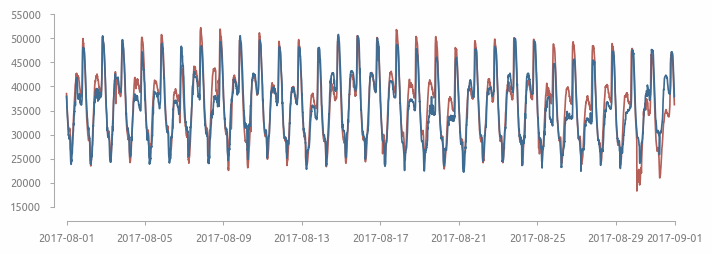

In [38]:
plt.plot(valid.index, y_valid, color=palette[1])
plt.plot(valid.index, y_pred, color=palette[2])
axis_rstyle()

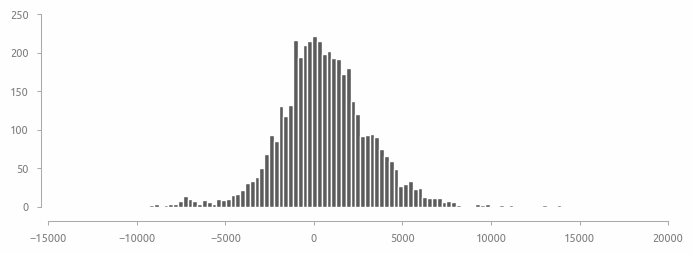

In [39]:
plt.hist(y_valid - y_pred, bins=100);
axis_rstyle()

In [40]:
lgb.feature_importances_

array([449, 529, 366,  19, 135, 389,  29,   0,  23, 475, 586], dtype=int32)

In [41]:
lgb.feature_name_

['temperature',
 'humidity',
 'windspeed',
 'minute',
 'hour',
 'weekday',
 'is_Friday',
 'is_Sunday',
 'is_31',
 'target1_previous_month',
 'minute_of_day']

In [46]:
feature_importances = pd.DataFrame(data=lgb.feature_importances_, columns=['importance'], index=lgb.feature_name_)

In [49]:
feature_importances.sort_values('importance', ascending=False)

,importance
minute_of_day,586
humidity,529
target1_previous_month,475
temperature,449
weekday,389
windspeed,366
hour,135
is_Friday,29
is_31,23
minute,19
